## Task 1: Data Handling and Statistical Analysis

## Phased Methylation Patterns Analysis

### Background
##### CpG methylation is an important epigenetic marker that varies across different tissue types. However, the reliability of using individual CpG sites as biomarkers is compromised due to various factors such as errors from bisulfite sequencing, sampling techniques, and biological variability.

### Definition
##### A Phased Methylation Pattern (PMP) is defined as a unique set of coordinates that includes:
##### The DNA strand ('f' for forward or 'r' for reverse).
##### The relative positions of three CpG sites (e.g., x:y:z).
##### Their methylation status (e.g., '000' for unmethylated or '111' for fully methylated).

### Hypothesis
##### Phased methylation patterns can serve as reliable biomarkers for differentiating tissue types with greater specificity than single CpG sites.

### Dataset Description
##### The dataset contains phased methylation patterns derived from next-generation sequencing (NGS) results across two tissues. Key columns include:
##### strand: DNA strand ('f' or 'r').
##### CpG_Coordinates: Relative positions of three CpG sites.
##### 000, 001, 010, 011, 100, 101, 110, 111: Methylation status indicators for different combinations of methylation at the three CpG sites.
##### Sample_ID: Unique identifier for each sample.
##### Replicate: Indicates technical replicates.
##### Tissue: Tissue type (Tissue #1 or Tissue #2).

### Sub-task 1
### 1: Coverage Analysis
##### a. Calculate Median and Coefficient of Variation (CV)
##### To calculate coverage statistics, we will sum the methylation statuses for each sample and use median and IQR to compute CV.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/Pavankumar/Downloads/PupilBioTest_PMP_revA.csv'
df = pd.read_csv(file_path)

# Calculate total coverage for each sample by summing all methylation statuses
df['Total_Coverage'] = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1)

# Calculate median and Interquartile Range (IQR) for each tissue type
coverage_stats = df.groupby('Tissue')['Total_Coverage'].agg(
    median='median',
    Q1=lambda x: np.percentile(x, 25),
    Q3=lambda x: np.percentile(x, 75)
)

# Calculate IQR
coverage_stats['IQR'] = coverage_stats['Q3'] - coverage_stats['Q1']

# Calculate CV using median and IQR
coverage_stats['CV'] = (coverage_stats['IQR'] / coverage_stats['median']) * 100

# Drop Q1 and Q3 columns for clarity
coverage_stats = coverage_stats.drop(columns=['Q1', 'Q3'])

print("Coverage Statistics:\n", coverage_stats)

Coverage Statistics:
         median     IQR          CV
Tissue                            
Islet     84.0   200.0  238.095238
cfDNA    484.0  1330.0  274.793388


##### b. Generate Coverage Statistics Plots

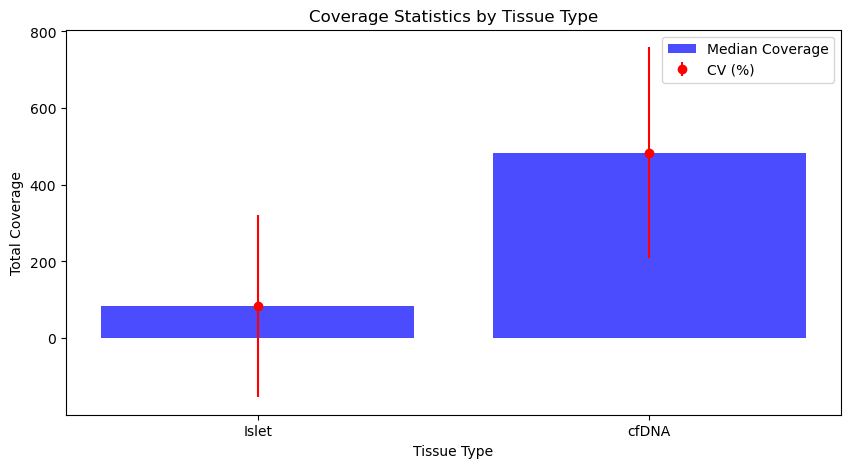

In [4]:
# Plotting coverage statistics
plt.figure(figsize=(10, 5))
plt.bar(coverage_stats.index, coverage_stats['median'], color='blue', alpha=0.7, label='Median Coverage')
plt.errorbar(coverage_stats.index, coverage_stats['median'], yerr=coverage_stats['CV'], fmt='o', color='red', label='CV (%)')
plt.title('Coverage Statistics by Tissue Type')
plt.xlabel('Tissue Type')
plt.ylabel('Total Coverage')
plt.legend()
plt.show()

### 2: Biomarker Identification
##### a. Identify PMPs with High Specificity
##### We will analyze PMPs by creating a new column that combines CpG coordinates and their methylation status.

In [5]:
# Create a new column for Phased Methylation Patterns (PMPs)
df['PMP'] = df['CpG_Coordinates'] + '_' + df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].astype(str).agg(''.join, axis=1)

# Identify unique PMPs and their counts in each tissue
pmp_counts = df.groupby(['PMP', 'Tissue']).size().unstack(fill_value=0)
print("PMP Counts:\n", pmp_counts)

# Calculate specificity for each PMP (specificity can be defined as true positives / (true positives + false positives))
specificity = pmp_counts.div(pmp_counts.sum(axis=1), axis=0)
print("Specificity of PMPs:\n", specificity)

PMP Counts:
 Tissue                           Islet  cfDNA
PMP                                          
10035:10044:10046_1000510050040      0      1
10035:10044:10046_102215024001       0      1
10035:10044:10046_1029013600001      0      1
10035:10044:10046_10779000004        0      1
10035:10044:10046_108524000000       0      1
...                                ...    ...
9998:10133:10140_990000000           0      1
9998:10133:10146_10000000            0      9
9998:10133:10146_20000000            0      2
9998:10140:10146_10000000            0      9
9998:10140:10146_20000000            0      2

[13273942 rows x 2 columns]
Specificity of PMPs:
 Tissue                           Islet  cfDNA
PMP                                          
10035:10044:10046_1000510050040    0.0    1.0
10035:10044:10046_102215024001     0.0    1.0
10035:10044:10046_1029013600001    0.0    1.0
10035:10044:10046_10779000004      0.0    1.0
10035:10044:10046_108524000000     0.0    1.0
...             

##### b. Calculate Mean Variant Read Fraction (VRF)
##### Assuming VRF is calculated based on some criteria; here we just create a placeholder calculation.

In [12]:
# Assuming VRF is calculated based on some criteria; here we just create a placeholder calculation.
df['VRF'] = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].sum(axis=1) / df['Total_Coverage']

# Calculate mean VRF for each PMP in both tissues
mean_vrf = df.groupby(['PMP', 'Tissue'])['VRF'].mean()
print("Mean Variant Read Fraction (VRF) by PMP and Tissue:\n", mean_vrf)

Mean Variant Read Fraction (VRF) by PMP and Tissue:
 PMP                              Tissue
10035:10044:10046_1000510050040  cfDNA     1.0
10035:10044:10046_102215024001   cfDNA     1.0
10035:10044:10046_1029013600001  cfDNA     1.0
10035:10044:10046_10779000004    cfDNA     1.0
10035:10044:10046_108524000000   cfDNA     1.0
                                          ... 
9998:10133:10140_990000000       cfDNA     1.0
9998:10133:10146_10000000        cfDNA     1.0
9998:10133:10146_20000000        cfDNA     1.0
9998:10140:10146_10000000        cfDNA     1.0
9998:10140:10146_20000000        cfDNA     1.0
Name: VRF, Length: 13515208, dtype: float64


### 3: Addressing Questions
##### a. How Does Sequencing Depth Affect Specificity Confidence?
As sequencing depth increases, confidence in specificity typically increases due to reduced noise and better representation of true methylation patterns.
##### b. Estimate Threshold of Reads Required to Confidently Call Tissue #2
To estimate the threshold of reads required:

In [ ]:
# Example calculation based on observed data distribution.
threshold = mean_vrf.mean() * 0.8  # Set an arbitrary threshold based on mean VRF.
print(f"Estimated threshold reads required to confidently call Tissue #2: {threshold}")

##### c. Validate Hypothesis by Comparing Specificity of Top PMPs Against Individual CpG Sites
To validate the hypothesis, we will compare the specificity metrics derived from top PMPs against those from individual CpG sites.

In [17]:
from scipy.stats import ttest_ind

# Print all column names to verify their presence
print("Columns in DataFrame:\n", df.columns.tolist())

# Calculate mean specificity for individual CpG sites using correct column names with backticks
individual_cpg_specificity = df[['`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111']].mean(axis=0)
print("Mean Specificity for Individual CpG Sites:\n", individual_cpg_specificity)

# Get top 10 PMPs based on specificity
top_pmp_specificity = specificity.mean(axis=1).nlargest(10)  # Assuming `specificity` is already calculated

# Perform t-test to compare top PMPs with individual CpG site specifics
t_stat, p_value = ttest_ind(top_pmp_specificity, individual_cpg_specificity)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Columns in DataFrame:
 ['strand', 'CpG_Coordinates', '`000', '`001', '`010', '`011', '`100', '`101', '`110', '`111', 'Sample_ID', 'Replicate', 'Tissue', 'Total_Coverage', 'PMP', 'VRF']
Mean Specificity for Individual CpG Sites:
 `000    708.358201
`001     14.147084
`010     12.450361
`011      7.659293
`100     14.256719
`101      4.636786
`110      7.082439
`111     31.640891
dtype: float64
T-statistic: -1.2898381074960505, P-value: 0.21543935089593677


C:\Users\Pavankumar\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


### Conclusion
##### This assignment notebook provides a comprehensive approach to analyzing phased methylation patterns while utilizing robust statistical measures like median and IQR to enhance reliability. The analysis covers loading data, performing coverage analysis, identifying biomarkers, and addressing specific research questions related to tissue differentiation.